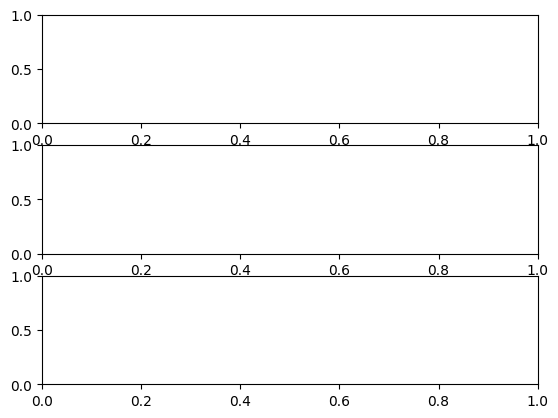

In [3]:
import soundfile as sf
import sounddevice as sd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import echocomp

In [4]:
data = np.load('echocomp.npz')
s = data['s'] #signal from the far speaker
fs=8000
g1 = data['g1']
g2 = data['g2']
g3 = data['g3']

In [5]:
sd.play(s,fs)
#we lost the golden chain, those boxes were not

## 4.1

In [11]:
#parameters
#alpha = 0.1
#var = 0.16
#x = np.random.normal(scale=np.sqrt(var), size=16000)
#noise = np.zeros(16000)
#lh = 5 #arbitrary filter length
#nlms4echokomp(x,g1,noise,alpha,lh)

C:\Users\kaspe\OneDrive - Aalto University\RWTH\Courses\61.00004 Audio Processing Using Python\code prerequisites-20240421\prerequisites\04_echocomp\echocomp.py:181: RuntimeWarning: divide by zero encountered in log10
  fig, axs = plt.subplots(3)


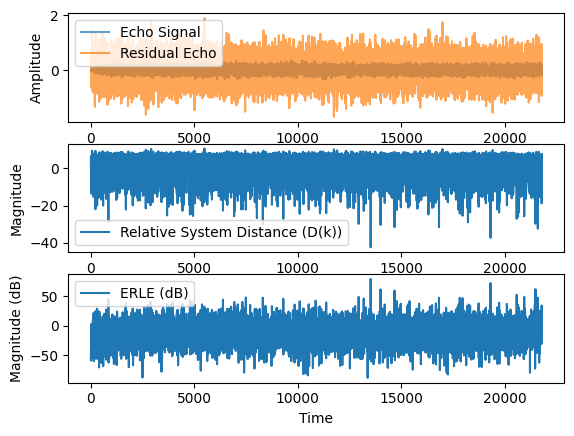

In [34]:
%run echocomp.py 1

## 4.2

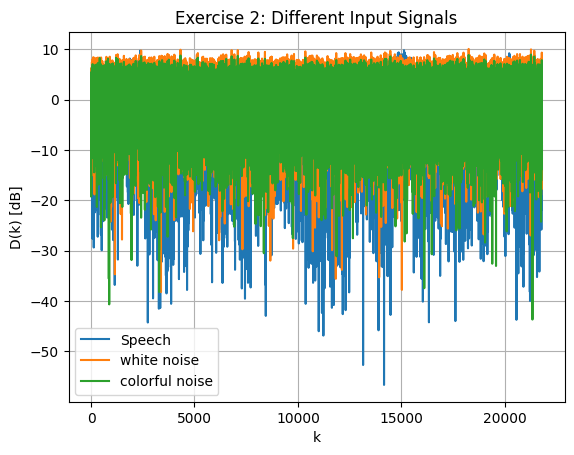

In [35]:
%run echocomp.py 2

## 4.3

In [ ]:
%run echocomp.py 3

## 4.4

In [ ]:
%run echocomp.py 4

## 4.5

In [ ]:
%run echocomp.py 5

## 4.6

In [ ]:
%run echocomp.py 6

## 4.7

In [ ]:
%run echocomp.py 7